# Supervised Learning Demos

In [1]:
import numpy as np 
np.random.seed(2) # 2 ok

import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout as tree_layout

import utils as u
import linearModels as lm
from radialBasis import RBF
from svm import SVM
import neuralNet as nn
from decisionTrees import DecisionTree

# Linear Models

## Models on different data sets

In [2]:
def run(model, n, axes=None):
    '''
    A function that generates some data, and judges a models
    performance in trying to learn this data. 
    '''
    f, line1 = u.genF()
    X, Y = u.genData(f, n, appendOnes=False)
    it, E_ins = model.fit(X, Y)
    
    if axes is None:
        fig, axes = plt.subplots(2, 1, figsize=(8,8))
        
    u.plotE_ins(E_ins, axis=axes[0])
    axes[0].set_title(f'Learning curve for {repr(model)}')
    
    u.plotLine(*line1, axis=axes[1], label='Target')
    model.boundary2D_plot(axis=axes[1], color='g', label='Hypothesis')
    u.quickScatter(X, Y, axis=axes[1])
    axes[1].set_xlim([-1, 1]); axes[1].set_ylim([-1, 1])
    axes[1].legend()
    axes[1].set_title(f'Decision boundary for {repr(model)}')

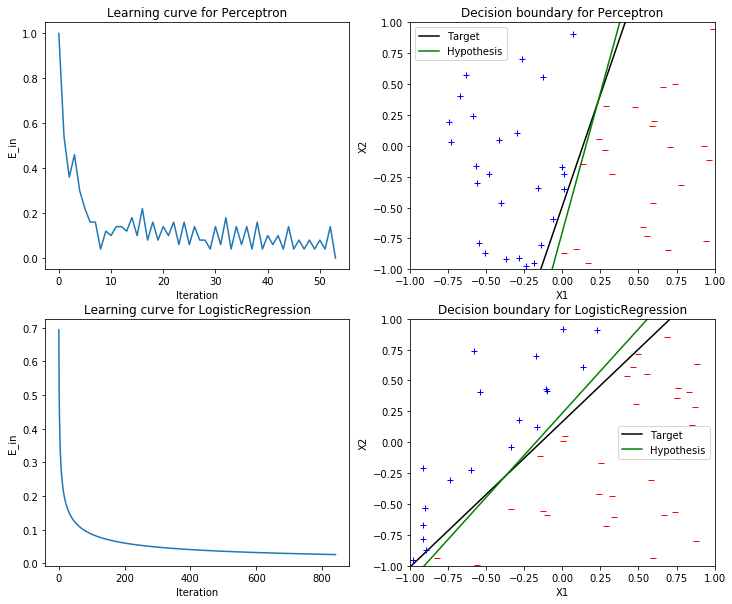

In [3]:
models = [lm.Perceptron(2), lm.LogisticRegression(2)]
fig, axes = plt.subplots(len(models), 2, figsize=(12, 5 * len(models)))
for i, model in enumerate(models):
    run(model, 50, axes=axes[i])

## Multiple models on same data set

In [4]:
def combinedRun(models, n):
    '''
    Function that compares models on the same data set
    '''
    f, line1 = u.genF()
    X, Y = u.genData(f, n)
    
    ax = plt.subplot(111)
    u.plotLine(*line1, axis=ax, label='Target')
    u.quickScatter(X, Y, axis=ax)
    
    for i, model in enumerate(models):
        _, E_ins = model.fit(X, Y)
        model.boundary2D_plot(axis=ax, color=u.rand_hex(), label=repr(model))
        
    ax.set_xlim([-1, 1]); ax.set_ylim([-1, 1])
    ax.legend()
    ax.set_title('Decision Boundary for various models!')

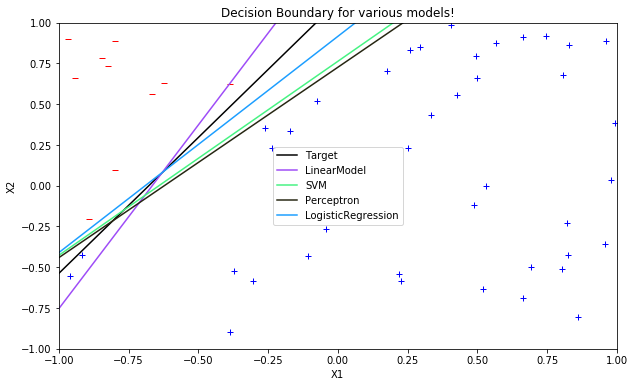

In [5]:
models = [lm.LinearModel(2), SVM(2), lm.Perceptron(2), lm.LogisticRegression(2)]
combinedRun(models, 50)
plt.gcf().set_size_inches(10, 6)

## Incorporating nonlinear transforms / using SVMs and RBFs

In [6]:
def combinedRun_nonlin(models, n):
    '''
    Function that compares models on the same data set
    '''
    f, r = u.genCircleF()
    X, Y = u.genData(f, n, appendOnes=False)
    
    ax = plt.subplot(111)
    circle = plt.Circle((0, 0), r, fill=False, color='k')
    circleHandle = matplotlib.patches.Patch(color='black')
    ax.add_artist(circle)
    u.quickScatter(X, Y, axis=ax)
    
    for model in models:
        _, E_ins = model.fit(X, Y)
        model.boundary2D_plot(axis=ax, x1Range=[-1,1], x2Range=[-1,1], \
                              label=repr(model), fontsize=15, color=u.rand_hex())
        if isinstance(model, RBF):
            model.plot_reps(axis=ax, c=u.rand_hex(), alpha=1.0, s=60)
        elif isinstance(model, SVM):
            model.plot_support_vecs(axis=ax, margin_svec_col=u.rand_hex(), alpha=1.0, s=60)
    
    # Build a legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles + [circleHandle], 
              labels=labels + ['target'])
    ax.set_title(f'Decision Boundary for various models!');

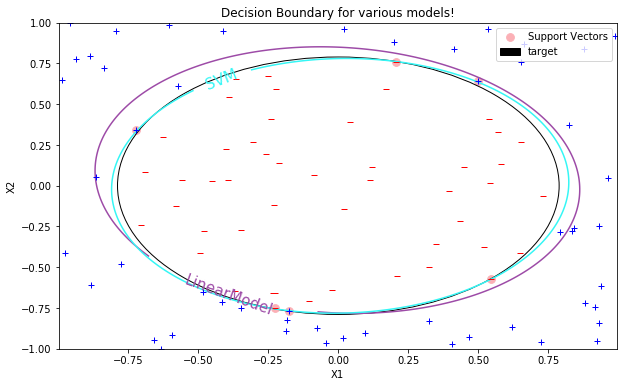

In [7]:
models = [lm.LinearModel(5, transform=u.genTransform(k=5)),
          #lm.LogisticRegression(5, transform=u.genTransform(k=5)),
          SVM(2, kernel='poly', Q=2)]
combinedRun_nonlin(models, 100)
plt.gcf().set_size_inches(10, 6)

# Decision Tree

In [8]:
f1 = lambda x: (x[0] < -0.3) ^ (x[0] < 0.7)
f2 = lambda x: (np.floor(1 * x[0]) + np.floor(2 * x[1])) % 2
f3, line = u.genF(zero_one=True)

X, Y = u.genData(f2, 1000, appendOnes=False)

In [9]:
d = DecisionTree(2)
d.fit(X, Y, maxNodes=50)

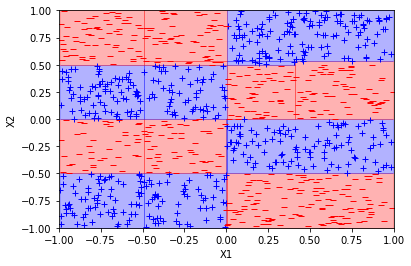

In [10]:
ax = plt.subplot(111)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
#u.plotLine(*line, axis=ax);
d.quickPlot(X, Y, axis=ax)

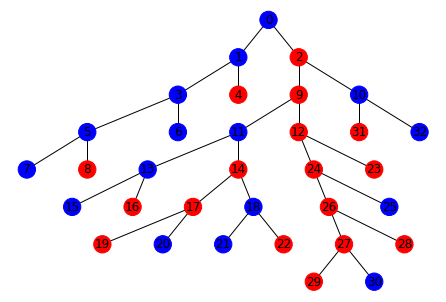

In [11]:
g = d.to_networkx()
pos=tree_layout(g, prog='dot')
colors = ['b' if n['value'] == 1 else 'r' for _, n in g.nodes(data=True)]
nx.draw(g, pos, with_labels=True, arrows=False, node_color=colors)

# Neural Net

### Logistic/Linear regression (to make sure the model works)

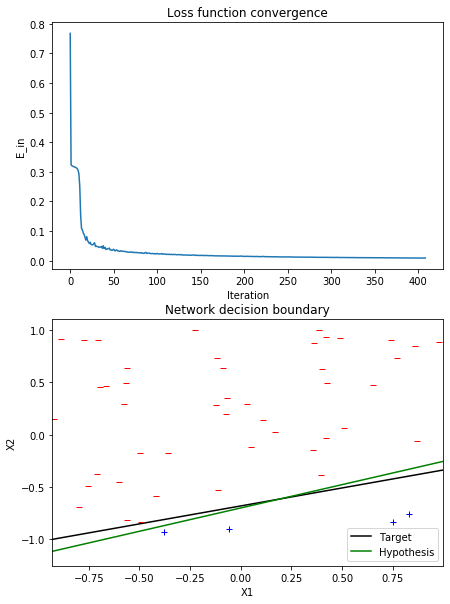

In [12]:
# Do linear regression as a one layer feedforward neural net with 3 feature inputs
f, line1 = u.genF()
X, Y = u.genData(f, 50, appendOnes=True)

model = nn.NeuralNet(sizes=[3, 1])
it, E_ins = model.fit(X, Y, maxIters=500, trackE_in=True)
nn.plot_helper(model, X, Y, E_ins, line1)
plt.gcf().set_size_inches(7, 10)

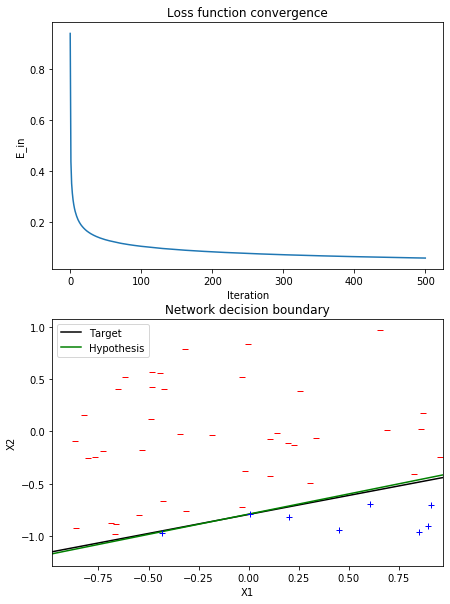

In [13]:
f, line1 = u.genF(zero_one=True) # We want labels to be 0/1 not -1/1
X, Y = u.genData(f, 50, appendOnes=True)

model = nn.NeuralNet(sizes=[3, 1], loss='log', nonLin='sigmoid')

it, E_ins = model.fit(X, Y, maxIters=500, trackE_in=True)
nn.plot_helper(model, X, Y, E_ins, line1)
plt.gcf().set_size_inches(7, 10)